In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.pylab import subplots, axis
import pandas as pd
import pickle
from datetime import date
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, widgets
import pylab

In [2]:
from pyspark import SparkContext
from pyspark.sql import *

In [3]:
sc = SparkContext(master="local[2]")

In [4]:
sqlContext = SQLContext(sc)

In [5]:
import warnings
warnings.filterwarnings("ignore")

_figsize = (10, 7)

In [6]:
state = "NY"
m = "SNWD"

### Parquets

In [7]:
ny_parquet = sqlContext.read.parquet("../Data/NY.parquet/")
stations_parquet = sqlContext.read.parquet("../Data/stations.parquet/")

print("Count of NY : ", ny_parquet.count())
print("Count of STATIONS : ", stations_parquet.count())

Count of NY :  168398
Count of STATIONS :  12140


In [8]:
print("----- NY DATA -----")
ny_parquet.show(5)

----- NY DATA -----
+-----------+-----------+----+--------------------+-----------------+--------------+------------------+-----------------+-----+-----------------+
|    Station|Measurement|Year|              Values|       dist_coast|      latitude|         longitude|        elevation|state|             name|
+-----------+-----------+----+--------------------+-----------------+--------------+------------------+-----------------+-----+-----------------+
|USW00094704|   PRCP_s20|1945|[00 00 00 00 00 0...|361.8320007324219|42.57080078125|-77.71330261230469|208.8000030517578|   NY|DANSVILLE MUNI AP|
|USW00094704|   PRCP_s20|1946|[99 46 52 46 0B 4...|361.8320007324219|42.57080078125|-77.71330261230469|208.8000030517578|   NY|DANSVILLE MUNI AP|
|USW00094704|   PRCP_s20|1947|[79 4C 75 4C 8F 4...|361.8320007324219|42.57080078125|-77.71330261230469|208.8000030517578|   NY|DANSVILLE MUNI AP|
|USW00094704|   PRCP_s20|1948|[72 48 7A 48 85 4...|361.8320007324219|42.57080078125|-77.71330261230469|2

## Statistics

In [9]:
# read statistics of NY data from STAT_NY.pickle
# "../data/STAT_NY.pickle" consists better overview and statistics of dataset

STAT, STAT_descr = pickle.load(open("../Data/STAT_NY.pickle", "rb"))
print(STAT.keys())
print(pd.DataFrame(STAT).index)
pd.DataFrame(STAT)

dict_keys(['SNOW_s20', 'TMIN_s20', 'TOBS', 'SNWD_s20', 'PRCP_s20', 'TOBS_s20', 'PRCP', 'TMAX', 'TMAX_s20', 'TMIN', 'SNOW', 'SNWD'])
Index(['NE', 'NO', 'eigval', 'Mean', 'mean', 'SortedVals', 'Cov', 'std',
       'high100', 'high1000', 'eigvec', 'O', 'Var', 'E', 'low100', 'UnDef',
       'low1000'],
      dtype='object')


,SNOW_s20,TMIN_s20,TOBS,SNWD_s20,PRCP_s20,TOBS_s20,PRCP,TMAX,TMAX_s20,TMIN,SNOW,SNWD
NE,"[12038.0, 12039.0, 12039.0, 12039.0, 12039.0, ...","[12615.0, 12615.0, 12615.0, 12615.0, 12615.0, ...","[9036.0, 9113.0, 9164.0, 9166.0, 9157.0, 9167....","[10777.0, 10775.0, 10775.0, 10774.0, 10773.0, ...","[15236.0, 15235.0, 15236.0, 15236.0, 15235.0, ...","[10090.0, 10090.0, 10090.0, 10090.0, 10090.0, ...","[13606.0, 13634.0, 13656.0, 13698.0, 13699.0, ...","[11568.0, 11628.0, 11652.0, 11660.0, 11658.0, ...","[12607.0, 12607.0, 12607.0, 12607.0, 12607.0, ...","[11568.0, 11629.0, 11652.0, 11663.0, 11658.0, ...","[9436.0, 9469.0, 9470.0, 9506.0, 9527.0, 9528....","[8126.0, 8167.0, 8198.0, 8192.0, 8197.0, 8218...."
NO,"[[12038.0, 12038.0, 12038.0, 12038.0, 12038.0,...","[[12615.0, 12615.0, 12615.0, 12615.0, 12615.0,...","[[9036.0, 8985.0, 9005.0, 8993.0, 8985.0, 8995...","[[10777.0, 10775.0, 10775.0, 10774.0, 10773.0,...","[[15236.0, 15235.0, 15235.0, 15235.0, 15234.0,...","[[10090.0, 10090.0, 10090.0, 10090.0, 10090.0,...","[[13606.0, 13532.0, 13494.0, 13507.0, 13501.0,...","[[11568.0, 11537.0, 11537.0, 11531.0, 11527.0,...","[[12607.0, 12607.0, 12607.0, 12607.0, 12607.0,...","[[11568.0, 11532.0, 11532.0, 11526.0, 11517.0,...","[[9436.0, 9365.0, 9339.0, 9349.0, 9363.0, 9355...","[[8126.0, 8037.0, 8013.0, 7992.0, 7982.0, 7987..."
eigval,"[8324.794377056878, 1985.717379339039, 1459.39...","[218872.57345183493, 25994.720253136347, 18038...","[307132.9834366321, 51540.96903205656, 30953.8...","[2227058.8157613804, 197787.2011074706, 161022...","[25810.2333755658, 10741.654107663826, 9042.33...","[300587.0543253952, 42170.567245838254, 19641....","[44219.41624029552, 34684.20032388285, 33691.0...","[116933.37990898985, 31316.00302881224, 30203....","[114205.3536421519, 20020.029102201242, 19461....","[221211.00190627636, 37011.859481314255, 33690...","[11152.335082092897, 9326.174911103268, 6642.1...","[2583681.0990271224, 433374.30801668705, 23011..."
Mean,"[14.053578153205564, 14.127857955728558, 14.19...","[-82.40050022036039, -83.41065333090837, -84.3...","[-39.921757414785304, -40.79787117304949, -36....","[106.25125718149944, 108.38554202334234, 110.4...","[25.07096863193567, 24.986228377489642, 24.904...","[-39.049407880346415, -39.868047549585164, -40...","[26.772159341467, 25.372817955112218, 28.41520...","[9.642548409405256, 6.937134502923977, 5.73532...","[9.304295384478227, 8.568664227165899, 7.87724...","[-85.9311030428769, -86.90910654398486, -79.46...","[16.667867740568038, 15.617171823846235, 17.13...","[113.66810238739848, 117.88918819640014, 122.1..."
mean,5.11045,28.3952,81.637,41.3979,28.7814,81.5189,28.297,139.453,139.604,28.4151,5.09835,43.5168
SortedVals,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-197.2, -155.4, -154.9, -154.8, -152.2, -150....","[-233.0, -222.0, -206.0, -172.0, -150.0, -144....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.664, 7.16, 8.086, 8.39, 9.51, 10.32, 10.45,...","[-90.75, -89.56, -88.6, -87.44, -85.9, -84.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-133.0, -122.0, -122.0, -122.0, -117.0, -117....","[-56.3, -46.2, -41.44, -32.28, -31.58, -27.36,...","[-317.0, -300.0, -283.0, -278.0, -267.0, -250....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
Cov,"[[112.15610874116581, 112.15539537942036, 112....","[[1389.4520424016919, 1394.9958047389564, 1399...","[[4517.9379905369915, 2122.367322943668, 912.6...","[[13870.201868043248, 14113.878478510547, 1434...","[[152.54139297286463, 151.99358304579619, 151....","[[1026.2008178944486, 1029.2560145649843, 1032...","[[3365.045398644609, 233.36577633035756, -274....","[[3589.090675801598, 2100.347141647276, 970.70...","[[782.5091019131384, 783.2813487961345, 783.70...","[[5291.242054730737, 3383.4226296286815, 1544....","[[2752.860650434394, 154.1544155530662, -28.52...","[[24402.633752416783, 23998.753588922013, 2295..."
std,8.52527,88.2418,111.594,100.939,13.

In [10]:
print("   Name  \t                 Description             \t  Size")
print("-"*80)
print('\n'.join(["%10s\t%40s\t%s"%(s[0],s[1],str(s[2])) for s in STAT_descr]))

   Name  	                 Description             	  Size
--------------------------------------------------------------------------------
SortedVals	                        Sample of values	vector whose length varies between measurements
     UnDef	      sample of number of undefs per row	vector whose length varies between measurements
      mean	                              mean value	()
       std	                                     std	()
    low100	                               bottom 1%	()
   high100	                                  top 1%	()
   low1000	                             bottom 0.1%	()
  high1000	                                top 0.1%	()
         E	                   Sum of values per day	(365,)
        NE	                 count of values per day	(365,)
      Mean	                                    E/NE	(365,)
         O	                   Sum of outer products	(365, 365)
        NO	               counts for outer products	(365, 365)
       Cov	                

In [11]:
eig_vec = STAT[m]["eigvec"]
mean = STAT[m]["Mean"]

## Operations in Spark DataFrame

In [12]:
snwd_df = ny_parquet.filter(ny_parquet.Measurement == m)
snwd_df = snwd_df.drop("State")
print("Total count of SNWD : ", snwd_df.count())
snwd_df.show(5)

Total count of SNWD :  14617
+-----------+-----------+----+--------------------+------------------+--------+------------------+-----------------+--------+
|    Station|Measurement|Year|              Values|        dist_coast|latitude|         longitude|        elevation|    name|
+-----------+-----------+----+--------------------+------------------+--------+------------------+-----------------+--------+
|USC00308600|       SNWD|1932|[00 7E 00 7E 00 7...|171.58099365234375|   42.75|-73.68329620361328|7.300000190734863|TROY L&D|
|USC00308600|       SNWD|1956|[00 7E 00 7E 00 7...|171.58099365234375|   42.75|-73.68329620361328|7.300000190734863|TROY L&D|
|USC00308600|       SNWD|1957|[C0 54 C0 54 C0 5...|171.58099365234375|   42.75|-73.68329620361328|7.300000190734863|TROY L&D|
|USC00308600|       SNWD|1958|[00 00 00 00 00 0...|171.58099365234375|   42.75|-73.68329620361328|7.300000190734863|TROY L&D|
|USC00308600|       SNWD|1959|[00 00 40 4E 40 4...|171.58099365234375|   42.75|-73.683296

In [13]:
def pack_array(arr):
    """pack a numpy array into a byte-array"""
    if type(arr) != np.ndarray:
        raise Exception("input for pack_array should be numpy.ndarray, instead got {}.".format(str(type(arr))))
    return bytearray(arr.tobytes())

In [14]:
def unpack_array(arr):
    """unpack a byte-array to numpy.ndarray"""
    return np.frombuffer(arr, dtype=np.float16)

In [15]:
class eigen_decomposition:
    """approximating a function with an orthonormal set of functions"""

    def __init__(self, x, f, mean, U):
        """
        initialize the widget
        
        :param x: defines the x locations
        :param f: the function to be approximated
        :param mean: The initial approximation (the mean)
        :param U: an orthonormal matrix with m columns (number of vectors to use in decomposition)
        
        :returns: None
        """
        self.U = U
        self.x = x
        self.mean = mean
        self.f = f
        self.startup_flag = True
        # computer the eigen-vectors coefficients
        self.C = np.dot((np.nan_to_num(f - mean)), self.U)
        self.C = np.array(self.C).flatten()
        self.m, self.n = np.shape(self.U)
        # Put the coefficient in the dictionary format that is used by "interactive".
        self.coeff = {'c' + str(i): self.C[i] for i in range(self.C.shape[0])}
        return None

    def compute_var_explained(self):
        """
        compute the summary of the decomposition

        :returns: 
            ('total_energy', total_energy),
            ('residual var after mean, eig1, eig2,...', residual_var[0]/total_energy, residual_var[1:]/residual_var[0]),
            ('reduction in var for mean, eig1, eig2,...', percent_explained[0]/total_energy, percent_explained[1:]/residual[0]),
            ('eigen-vector coefficients', self.C)

        :rtype: tuple of pairs
            The first element in each pair is a description, the second is a number or a list of numbers or an array.
        """
        def compute_var(vector):
            v = np.array(np.nan_to_num(vector), dtype=np.float64)
            return np.dot(v, v)  # returns float(total_variance)

        k = self.U.shape[1]
        residual_var = np.zeros(k + 1)
        # init residual to function
        residual = self.f
        total_energy = compute_var(residual)
        # set residual to function - mean
        residual = residual - self.mean
        residual_var[0] = compute_var(residual)
        # compute residuals after each
        for i in range(k):
            g = self.U[:, i] * self.coeff['c' + str(i)]
            g = np.array(g).flatten()
            # subtract projection on i'th coefficient from residual
            residual = residual - g
            residual_var[i + 1] = compute_var(residual)

        # normalize residuals
        # Divide ressidulas by residuals after subtracting mean
        _residuals = residual_var / residual_var[0]
        _residuals[0] = residual_var[0] / total_energy

        return (('total_energy', total_energy),
                ('fraction residual var after mean, eig1, eig2,...', _residuals),
                ('eigen-vector coefficients', self.coeff))

    # total_var,residuals,reductions,coeff=recon.compute_var_explained()

In [16]:
def decompose_dataframe(sqlContext, df, EigVec, Mean):
    """ run decompose(row) on all rows, 
        return an augmented dataframe with columns corresponding to residuals and coefficients."""
    
    def decompose(row):
        """
        compute residual and coefficients for a single row      

        :param row: SparkSQL Row that contains the measurements for a particular station, year and measurement. 
        :returns: the input row with additional information from the eigen-decomposition.
        :rtype: SparkSQL Row 

        Note that Decompose is designed to run inside a spark "map()" command inside decompose_dataframe.
        Mean and EigVec are sent to the workers as global variables of "decompose"

        """
        Series = np.array(unpack_array(row.Values), dtype=np.float64)
        recon = eigen_decomposition(None, Series, Mean, EigVec)
        total_var, residuals, coeff = recon.compute_var_explained()

        D = row.asDict()
        D['total_var'] = float(total_var[1])
        D['res_mean'] = float(residuals[1][0])
        for i in range(1, residuals[1].shape[0]):
            D['res_' + str(i)] = float(residuals[1][i])
            D['coeff_' + str(i)] = float(coeff[1]['c' + str(i-1)])
        return Row(**D)

    # body of decompose_dataframe
    rdd2 = df.rdd.map(decompose)
    return sqlContext.createDataFrame(rdd2)

In [18]:
k = 5
compute_df = decompose_dataframe(sqlContext, snwd_df, eig_vec[:, :k], mean).cache()
compute_df.count()

14617

In [19]:
print("----- STATIONS DATA -----")
stations_parquet.show(5)

----- STATIONS DATA -----
+-----------+----------+--------+---------+---------+-----+----------------+
|    Station|Dist_coast|Latitude|Longitude|Elevation|State|            Name|
+-----------+----------+--------+---------+---------+-----+----------------+
|USC00341900|   739.956|    36.3| -96.4667|    242.3|   OK|       CLEVELAND|
|USC00428114|    908.22|    40.1|-111.6667|   1409.1|   UT|SPANISH FORK 1 S|
|USC00165926|   23.8801| 29.7853| -90.1158|      0.9|   LA|   MARRERO 9 SSW|
|USC00411974|   541.905| 31.5333|-101.2842|    755.9|   TX|        COPE RCH|
|USC00318906|   310.311| 35.5231| -81.4439|    274.3|   NC|    VALE AG 2 SW|
+-----------+----------+--------+---------+---------+-----+----------------+
only showing top 5 rows



In [20]:
stations_parquet = stations_parquet.select("Station", "State")
stations_parquet.show(5)

+-----------+-----+
|    Station|State|
+-----------+-----+
|USC00341900|   OK|
|USC00428114|   UT|
|USC00165926|   LA|
|USC00411974|   TX|
|USC00318906|   NC|
+-----------+-----+
only showing top 5 rows



In [21]:
joint_df = compute_df.join(stations_parquet, on="Station", how="left")
joint_df.show(3)

+-----------+-----------+--------------------+----+-------------------+-------------------+------------------+------------------+-------------------+------------------+-----------------+--------+------------------+--------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+---------+-----+
|    Station|Measurement|              Values|Year|            coeff_1|            coeff_2|           coeff_3|           coeff_4|            coeff_5|        dist_coast|        elevation|latitude|         longitude|    name|              res_1|              res_2|              res_3|              res_4|             res_5|          res_mean|total_var|State|
+-----------+-----------+--------------------+----+-------------------+-------------------+------------------+------------------+-------------------+------------------+-----------------+--------+------------------+--------+-------------------+-------------------+-------------------+-

In [22]:
# removing years in the data which have minimal snow fall

print("total count : ", joint_df.count())
joint_df2 = joint_df.filter(joint_df.res_mean < 1)
print("rows where mean is better approx than zero : ", joint_df2.count())

total count :  14617
rows where mean is better approx than zero :  8174


## Plot Mean and Eigen Vectors

In [23]:
# yearly plotter class

class YearPlotter:
    def __init__(self):
        start = 365 * 1 + 1
        self.dates = [date.fromordinal(i) for i in range(start, start + 365)]
        self.monthsFmt = DateFormatter("%b")
        self.months = MonthLocator(range(1, 13), bymonthday=1, interval=3)

    def plot(self, T, fig, ax, label='', labels=None, title=None):
        shp = np.shape(T)
        if shp[0] != 365:
            raise ValueError(
                "First dimension of T should be 365. Shape(T)="+str(np.shape(T)))
        if len(shp) == 1:
            ax.plot(self.dates, T, label=label)
        else:
            if labels is None:
                labels = [str(i) for i in range(shp[1])]
            for i in range(shp[1]):
                ax.plot(self.dates, T[:, i], label=labels[i])
        ax.xaxis.set_major_locator(self.months)
        ax.xaxis.set_major_formatter(self.monthsFmt)
        if not title is None:
            ax.set_title(title)
        fig.autofmt_xdate()
        ax.grid()
        ax.legend()

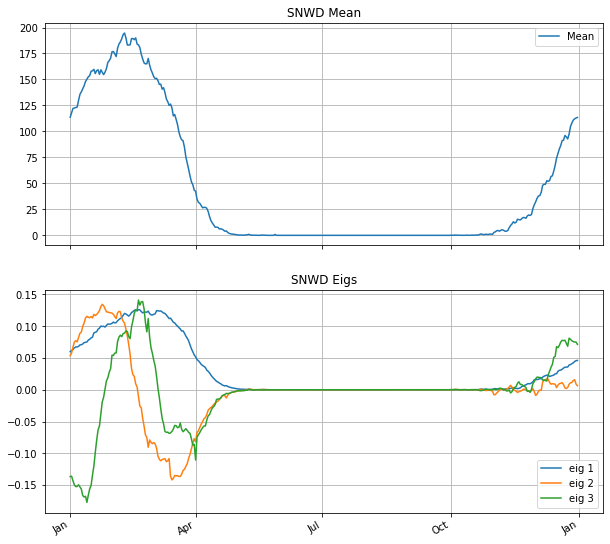

In [24]:
yp = YearPlotter()

fig, axes = pylab.subplots(2, 1, sharex="col", sharey="row", figsize=(10, 10))

k = 3
eig_vec = np.array(STAT[m]["eigvec"][:, :k])
mean = STAT[m]["Mean"]

yp.plot(mean, fig, axes[0], label="Mean", title=m+" Mean")
yp.plot(eig_vec, fig, axes[1], labels=["eig "+str(i + 1) for i in range(k)], title=m+" Eigs")

## Plot Percentage of Variance Explained

Text(0, 0.5, 'Percentage of Variance Explained')

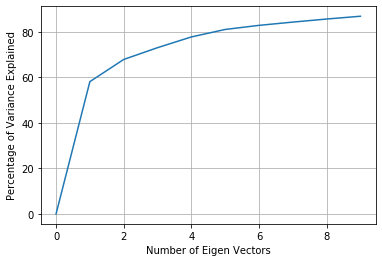

In [25]:
fig, ax = pylab.subplots(1, 1)

eig_val = STAT[m]["eigval"]
eig_val /= sum(eig_val)
cum_var = np.cumsum(eig_val)
cum_var = 100 * np.insert(cum_var, 0, 0)

ax.plot(cum_var[:10])
ax.grid()
ax.set_xlabel("Number of Eigen Vectors")
ax.set_ylabel("Percentage of Variance Explained")

## Exploring the Decomposition

### A. Intuitive Analysis

In [26]:
# combine mean with eigen vectors and scale to similar range
print("Eigen Vectors Shape : ", eig_vec.shape)

norm_mean = mean / max(mean) * 0.2
op = [norm_mean] + [eig_vec[:, i] for i in range(eig_vec.shape[1])]

combined_arr = np.stack(op).transpose()
print("Combined Array Shape : ", combined_arr.shape)

Eigen Vectors Shape :  (365, 3)
Combined Array Shape :  (365, 4)


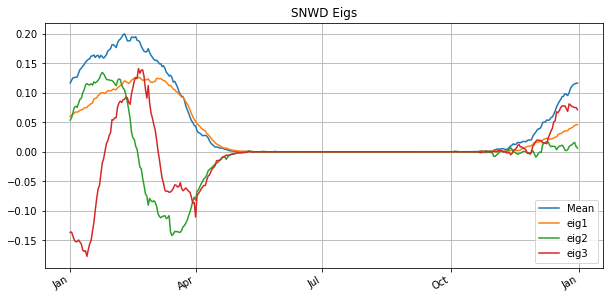

In [27]:
fig, ax = pylab.subplots(1, 1, figsize=(10, 5))

k = 3
eig_vec = np.array(STAT[m]["eigvec"][:, :k])
mean = STAT[m]["Mean"]

yp.plot(combined_arr, fig, ax, labels=["Mean"]+['eig'+str(i + 1) for i in range(k)], title=m+" Eigs")

In [28]:
print("""
Insights from the above graph:

-> eig_1 is very similar to mean | indicates heavy/light snow
-> coeff_1 is large | snow accumulation is higher

-> eig_2 is positive for jan, negative for march | indicates early vs late season
-> coeff_2 is high | snow season is early

-> eig_3 is positive for feb, negative for jan & march | indicates short vs long season
-> coeff_3 is high | season is short
""")


Insights from the above graph:

-> eig_1 is very similar to mean | indicates heavy/light snow
-> coeff_1 is large | snow accumulation is higher

-> eig_2 is positive for jan, negative for march | indicates early vs late season
-> coeff_2 is high | snow season is early

-> eig_3 is positive for feb, negative for jan & march | indicates short vs long season
-> coeff_3 is high | season is short



### B. Study the effect of coeff_2

In [29]:
joint_df3 = joint_df2.filter(joint_df2.res_2 < 0.1).sort(joint_df2.coeff_2)
print("For coeff_2, count : ", joint_df3.count())

all_rows = joint_df3.collect()
rows = all_rows[:12]

For coeff_2, count :  216


In [30]:
joint_df3.select("coeff_1", "coeff_2", "coeff_3", "res_1", "res_2", "res_3").show(n=4, truncate=14)

+--------------+--------------+--------------+--------------+--------------+--------------+
|       coeff_1|       coeff_2|       coeff_3|         res_1|         res_2|         res_3|
+--------------+--------------+--------------+--------------+--------------+--------------+
|5834.375859...|-4358.86473...|-1413.70280...|0.415781391...|0.093341629...|0.064083341...|
|6101.635000...|-4194.93175...|241.5286385...|0.358770222...|0.094581908...|0.094307960...|
|11409.24299...|-3501.89021...|435.9796661...|0.134821347...|0.053313919...|0.052050567...|
|10996.87201...|-3174.50910...|2029.367114...|0.156513816...|0.086223939...|0.057498884...|
+--------------+--------------+--------------+--------------+--------------+--------------+
only showing top 4 rows



In [31]:
class recon_plot:
    """create an interactive demonstration of approximating a function with an orthonormal set of function"""

    def __init__(self, eigen_decomp, year_axis=False, fig=None, ax=None, interactive=False, Title=None, figsize=(6, 4)):
        self.eigen_decomp = eigen_decomp
        self.interactive = interactive
        self.fig = fig
        self.ax = ax
        self.Title = Title
        self.figsize = figsize
        self.i = 0
        self.year_axis = year_axis
        self.yearPlotter = None
        if year_axis:
            self.yearPlotter = YearPlotter()
        if not self.interactive:
            self.plot_combination(**self.eigen_decomp.coeff)
        return None

    def get_Interactive(self):
        widge_list, widge_dict = self.get_widgets()
        w = interactive(self.plot_combination, **widge_dict)
        self.Title = 'Interactive reconstruction'
        return widgets.VBox([widgets.HBox(widge_list), w.children[-1]])

    def get_widgets(self):
        """return the slider widget"""
        coeff = self.eigen_decomp.C
        widge_dict = {}
        widge_list = []
        for i in range(self.eigen_decomp.n):
            if coeff[i] > 0:
                r = [0, coeff[i]]
            else:
                r = [coeff[i], 0]
            widge_list.append(widgets.FloatSlider(min=r[0], max=r[1], step=(r[1]-r[0])/10.,
                                                  value=0, orientation='vertical', decription='v'+str(i)))
            widge_dict['c'+str(i)] = widge_list[-1]
        return widge_list, widge_dict

    def plot(self, y, label=''):
        if self.year_axis:
            self.yearPlotter.plot(y, self.fig, self.ax, label=label)
        else:
            self.ax.plot(self.eigen_decomp.x, y, label=label)

    def plot_combination(self, **coeff):
        """plot function according the the parameters set by the sliders"""
        if self.interactive or self.fig is None:
            self.fig = plt.figure(figsize=self.figsize)
            self.ax = self.fig.add_axes([0, 0, 1, 1])
        A = self.eigen_decomp.mean
        self.plot(A, label='mean')
        for i in range(self.eigen_decomp.n):
            g = self.eigen_decomp.U[:, i]*coeff['c'+str(i)]
            A = A + g
            self.plot(A, label='c'+str(i))
        self.plot(self.eigen_decomp.f, label='target')
        self.ax.grid(figure=self.fig)
        self.ax.legend()
        self.ax.set_title(self.Title)
        if self.interactive:
            plt.show()
        else:
            self.fig.show()
        return None

In [32]:
def plot_decomp(row, Mean, EigVec, fig=None, ax=None, Title=None, interactive=False):
    """plot a single reconstruction with an informative title"""
    target = np.array(unpack_array(row.Values), dtype=np.float64)
    if Title is None:
        Title = '%s / %d    %s' % (row['station'],
                                   row['year'], 
                                   row['measurement'])
    eigen_decomp = eigen_decomposition(range(1, 366), target, Mean, EigVec)
    plotter = recon_plot(eigen_decomp, year_axis=True,
                         fig=fig, ax=ax, interactive=interactive, Title=Title)
    return plotter

In [33]:
def plot_recon_grid(rows, Mean, EigVec, column_n=4, row_n=3, figsize=(15, 10),
                    header='c2=%3.2f, r2=%3.2f', params=('coeff_2', 'res_2')):
    """plot a grid of reconstruction plots"""
    fig, axes = plt.subplots(row_n, column_n, sharex='col', sharey='row', figsize=figsize)
    k = 0
    for i in range(row_n):
        for j in range(column_n):
            row = rows[k]
            k += 1
            P = tuple([row[p] for p in params])
            _title = header % P
            plot_decomp(row, Mean, EigVec, fig=fig, ax=axes[i, j], Title=_title, interactive=False)
    return None

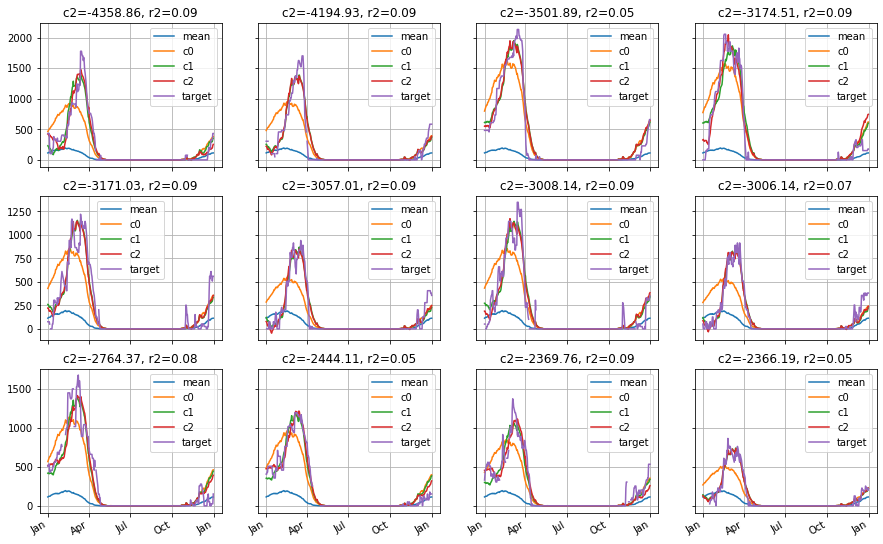

In [34]:
# SNWD grid -> negative coeff 2

plot_recon_grid(all_rows[:12], mean, eig_vec)

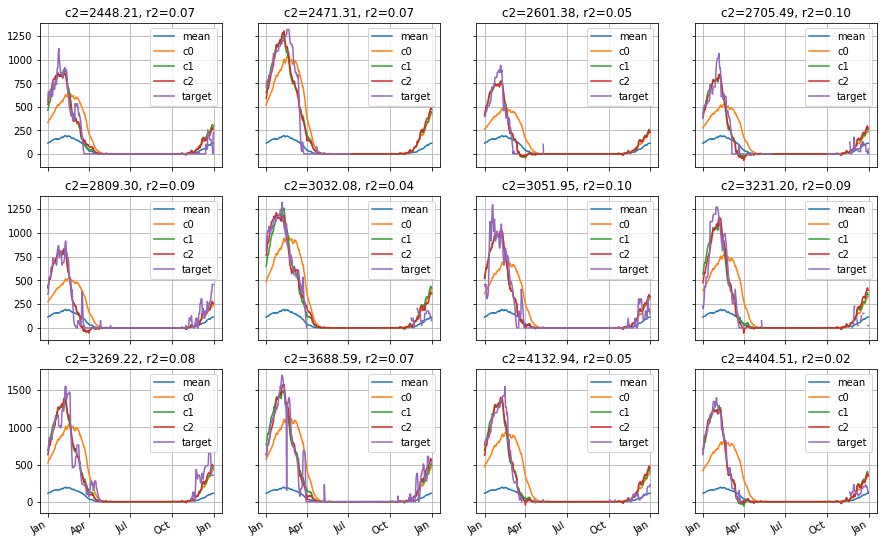

In [35]:
# SNWD grid -> positive coeff 2

plot_recon_grid(all_rows[-12:], mean, eig_vec)

### C. Study the effect of coeff_3

In [36]:
joint_df3 = joint_df2.filter(joint_df2.res_3 < 0.1).sort(joint_df2.coeff_3)
print("For coeff_3, count : ", joint_df3.count())

all_rows = joint_df3.collect()
rows = all_rows[:12]

For coeff_3, count :  324


In [37]:
joint_df3.select("coeff_1", "coeff_2", "coeff_3", "res_1", "res_2", "res_3").show(n=4, truncate=14)

+--------------+--------------+--------------+--------------+--------------+--------------+
|       coeff_1|       coeff_2|       coeff_3|         res_1|         res_2|         res_3|
+--------------+--------------+--------------+--------------+--------------+--------------+
|10515.45482...|1506.481350...|-2885.20448...|0.121392613...|0.103359685...|0.037215461...|
|6720.193349...|-1996.79923...|-2614.86586...|0.244854829...|0.178184021...|0.063852563...|
|5807.257103...|1677.494193...|-2568.57825...|0.281069681...|0.221902394...|0.079949267...|
|8118.021975...|-1480.81053...|-1966.09602...|0.135403586...|0.105621708...|0.053182363...|
+--------------+--------------+--------------+--------------+--------------+--------------+
only showing top 4 rows



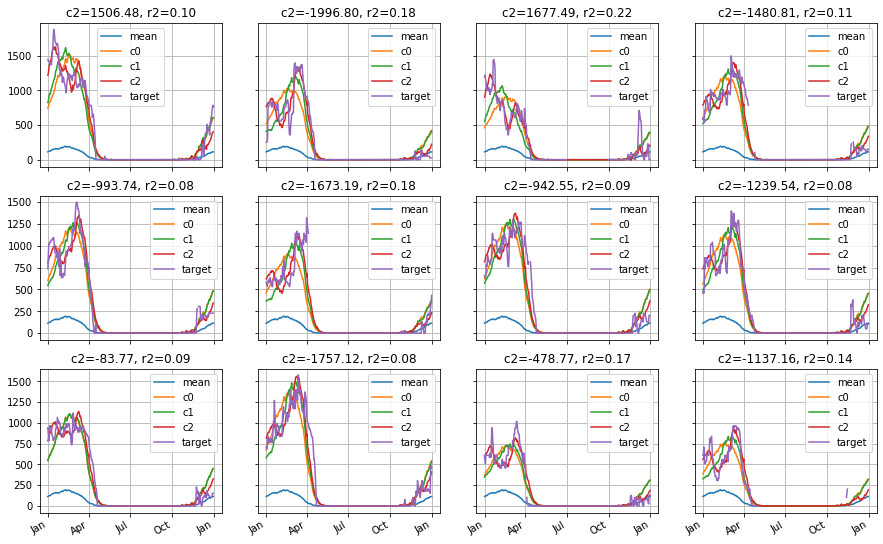

In [38]:
# SNWD grid -> negative coeff 3

plot_recon_grid(all_rows[:12], mean, eig_vec)

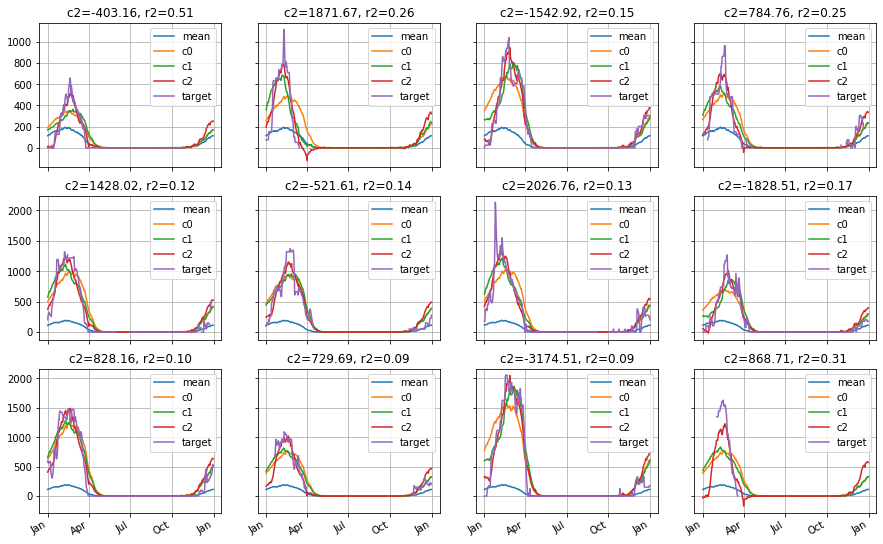

In [39]:
# SNWD grid -> positive coeff 3

plot_recon_grid(all_rows[-12:], mean, eig_vec)

### D. Best Fit

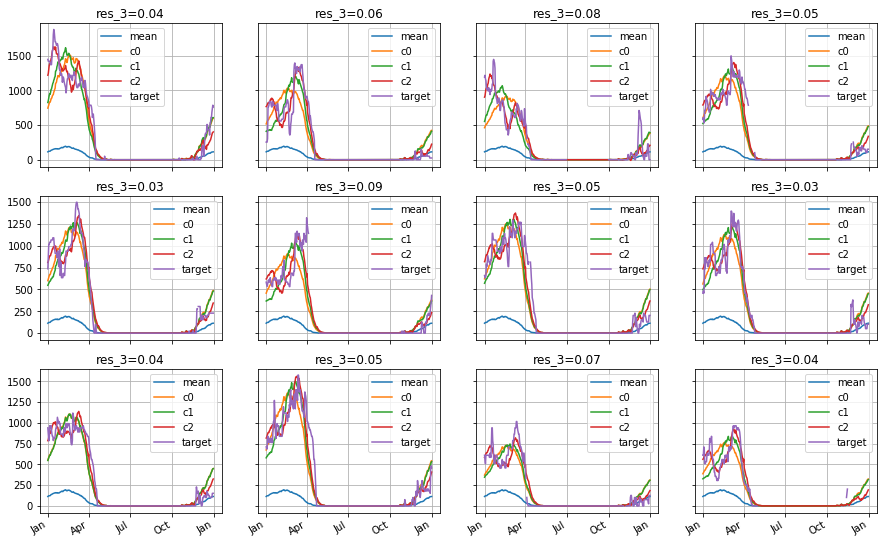

In [40]:
# plotting SNWD sequences, these sequences are referred to as Architypical Sequences

plot_recon_grid(all_rows[:12], mean, eig_vec, header="res_3=%3.2f", params=("res_3",))

### E. Worst Fit

In [41]:
# plotting sequences which have 3rd highest residual
# TODO: debug worst fit

# worst_case = all_rows[-4:] + all_rows[-504:-500] + all_rows[-1004:-1000]
# plot_recon_grid(worst_case, mean, eig_vec, header="res_3=%3.2f", params=("res_3",))

## Study the distribution of the coefficients

In [42]:
res_df = joint_df2.select("Station", "Year", "coeff_1", "coeff_2", "coeff_3", 
                          "res_1", "res_2", "res_3", "res_mean", "total_var").toPandas()
res_df

,Station,Year,coeff_1,coeff_2,coeff_3,res_1,res_2,res_3,res_mean,total_var
0,USC00308600,1958,-222.691170,96.439760,306.545242,0.965500,0.958153,0.886120,0.484412,3026570.0
1,USC00308600,1960,-554.769989,-93.005504,-170.876521,0.667969,0.661355,0.633687,0.667152,1416250.0
2,USC00308600,1961,-278.925305,453.997417,-126.089157,0.921887,0.714941,0.698979,0.383755,2595353.0
3,USC00308600,1962,-399.342868,-499.452706,274.897485,0.887155,0.710797,0.657367,0.607708,2327849.0
4,USC00308600,1963,-23.201375,119.030899,527.383962,0.999580,0.988521,0.771427,0.358147,3577205.0
...,...,...,...,...,...,...,...,...,...,...
8169,USC00307664,1916,161.757391,-198.204625,-70.363371,0.947862,0.872760,0.863555,0.694489,1416650.0
8170,USC00307664,1920,4.414109,-0.795462,3.617158,0.999497,0.999480,0.999142,0.809435,95626.0
8171,USC00307664,1942,-86.013801,-22.851470,18.272503,0.896813,0.889638,0.884104,0.695525,190592.0
8172,USC00307664,1949,-658.794351,133.120523,131.941238,0.547635,0.534040,0.521275,0.888363,1139047.0


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 <a list of 63 Text xticklabel objects>)

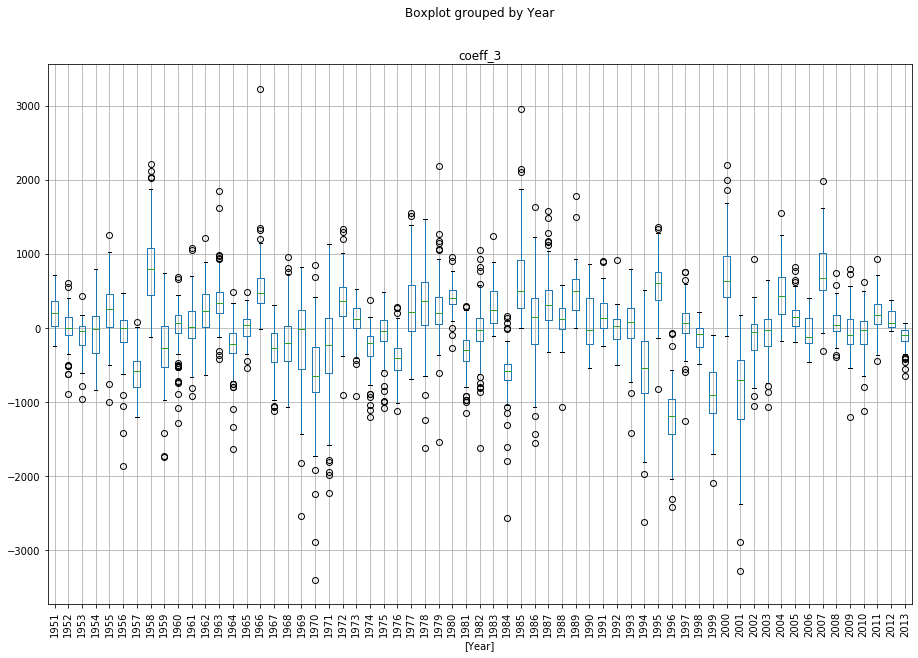

In [43]:
res_df[['Year', 'coeff_3']][res_df['Year'] > 1950].boxplot(by='Year',figsize=[15,10])
plt.xticks(rotation=90)

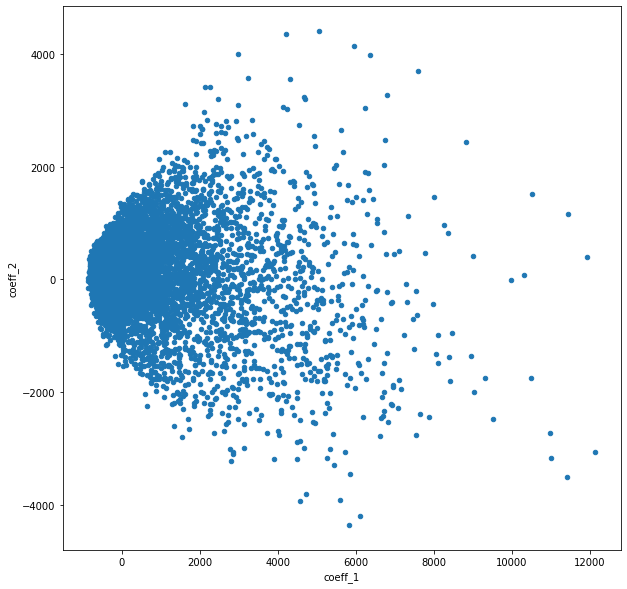

In [44]:
res_df.plot.scatter('coeff_1', 'coeff_2', figsize=[10,10])

In [45]:
grouped_df = res_df.groupby("Year")["coeff_1"]
ratio = grouped_df.mean() / grouped_df.std()
(np.nanmax(ratio), np.nanmin(ratio))

(1.0582367314744345, -0.9333313252469629)

In [46]:
def plot_CDF(feat):
    """plot cummutative distribution function"""
    rows = joint_df2.select(feat).sort(feat).collect()
    vals = [r[feat] for r in rows]
    P = np.arange(0, 1, 1./(len(vals)+1))
    vals = [vals[0]] + vals
    axis.plot(vals, P, label=feat)

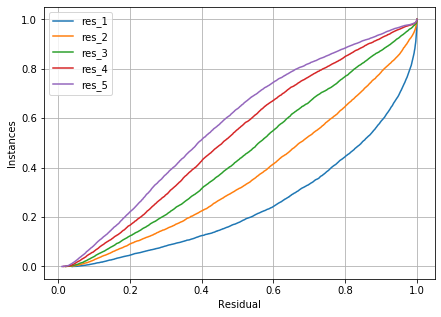

In [47]:
plt.figure(figsize=(7, 5))
axis = plt.gca()

#plot_CDF('res_mean') # why does this not fit?
plot_CDF('res_1')
plot_CDF('res_2')
plot_CDF('res_3')
plot_CDF('res_4')
plot_CDF('res_5')
plt.ylabel('Instances')
plt.xlabel('Residual')
plt.grid()
plt.legend()